In [2]:
import json
from pathlib import Path
import shutil

# Paths to your JSON datasets and destination
json_dir_path = Path('/Volumes/PRIYA/json_dataset')
destination_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON')
destination_path.mkdir(parents=True, exist_ok=True)

# Counters
count_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
total_files_processed = 0

# Sum quantities function
def sum_quantities(data):
    return sum(item['quantity'] for item in data['BIN_FCSKU_DATA'].values())

# Open and load JSON data
def open_json_file(json_file, encoding='utf-8'):
    try:
        with open(json_file, 'r', encoding=encoding) as file:
            return json.load(file)
    except UnicodeDecodeError:
        # Try a different encoding
        with open(json_file, 'r', encoding='latin1') as file:
            return json.load(file)

# Process files
for json_file in json_dir_path.glob('*.json'):
    try:
        data = open_json_file(json_file)
        total_quantity = sum_quantities(data)
        if total_quantity in count_dict:
            count_dict[total_quantity] += 1
            if total_quantity <= 5:
                shutil.copy(str(json_file), destination_path / json_file.name)
        total_files_processed += 1
        if total_files_processed % 1000 == 0:  # Report progress every 1000 files
            print(f"{total_files_processed} files processed.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from file {json_file}: {e}")

# Output the final count
for count, num_files in count_dict.items():
    print(f"Number of files with {count} items: {num_files}")


1000 files processed.
2000 files processed.
3000 files processed.
4000 files processed.
5000 files processed.
6000 files processed.
7000 files processed.
8000 files processed.
9000 files processed.
10000 files processed.
11000 files processed.
12000 files processed.
13000 files processed.
14000 files processed.
15000 files processed.
16000 files processed.
17000 files processed.
18000 files processed.
19000 files processed.
20000 files processed.
21000 files processed.
22000 files processed.
23000 files processed.
24000 files processed.
25000 files processed.
26000 files processed.
27000 files processed.
28000 files processed.
29000 files processed.
30000 files processed.
31000 files processed.
32000 files processed.
Error decoding JSON from file /Volumes/PRIYA/json_dataset/._00001.json: Expecting value: line 1 column 1 (char 0)
Error decoding JSON from file /Volumes/PRIYA/json_dataset/._00003.json: Expecting value: line 1 column 1 (char 0)
Number of files with 0 items: 591
Number of f

In [5]:
import shutil
from pathlib import Path

# Define the source and destination directories
json_dir_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON')
img_dir_path = Path('/Volumes/PRIYA/Dataset_Amazon_bin/jpg_dataset')
destination_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images')
destination_path.mkdir(parents=True, exist_ok=True)

# Counter for images copied
images_copied = 0

# Copy images corresponding to the JSON files
for json_file in json_dir_path.glob('*.json'):
    image_filename = json_file.stem + '.jpg'
    image_path = img_dir_path / image_filename
    
    if image_path.exists():
        shutil.copy(str(image_path), destination_path / image_filename)
        images_copied += 1
        if images_copied % 1000 == 0:
            print(f"{images_copied} images copied.")
    else:
        print(f"Image file not found for: {json_file.stem}")

# Output the total number of images copied
print(f"Total images copied: {images_copied}")


1000 images copied.
2000 images copied.
3000 images copied.
4000 images copied.
5000 images copied.
6000 images copied.
7000 images copied.
8000 images copied.
9000 images copied.
10000 images copied.
11000 images copied.
12000 images copied.
13000 images copied.
14000 images copied.
15000 images copied.
16000 images copied.
17000 images copied.
18000 images copied.
19000 images copied.
20000 images copied.
21000 images copied.
22000 images copied.
Total images copied: 22098


Taking 10000 Samples of JSON metadata and images

In [64]:
import shutil
from pathlib import Path
import json

# Paths and directory setup
json_dir_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON')
destination_json_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON10000')
destination_json_path.mkdir(parents=True, exist_ok=True)

# Minimum counts per category and additional counts beyond the minimum
base_count = 591
additional_counts = {1: 1409, 2: 1409, 3: 1409, 4: 1409, 5: 1409}
selected_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

# Function to sum quantities in a JSON file
def sum_quantities(data):
    if "BIN_FCSKU_DATA" in data and data["BIN_FCSKU_DATA"]:
        return sum(item['quantity'] for item in data['BIN_FCSKU_DATA'].values())
    else:
        # Use EXPECTED_QUANTITY if BIN_FCSKU_DATA is empty
        return data.get('EXPECTED_QUANTITY', 0)

# Open and load JSON data
def open_json_file(json_file, encoding='utf-8'):
    try:
        with open(json_file, 'r', encoding=encoding) as file:
            return json.load(file)
    except UnicodeDecodeError:
        with open(json_file, 'r', encoding='latin1') as file:
            return json.load(file)

# Process files and copy an equal number of JSON files for each category
for json_file in json_dir_path.glob('*.json'):
    data = open_json_file(json_file)
    total_quantity = sum_quantities(data)
    
    # Check if the file belongs to a category we're interested in
    if total_quantity in selected_counts:
        # Check if we need more of this category and if it's part of the base count
        if selected_counts[total_quantity] < base_count or (total_quantity > 0 and selected_counts[total_quantity] < base_count + additional_counts[total_quantity]):
            # Copy the JSON file
            shutil.copy(str(json_file), destination_json_path / json_file.name)
            selected_counts[total_quantity] += 1
            if sum(selected_counts.values()) >= 10000:  # Stop after 10,000 files
                break

# Output the final count for verification
total_json_copied = sum(selected_counts.values())
print(f"Total JSON files copied: {total_json_copied}")
for category, count in selected_counts.items():
    print(f"Category {category}: {count} JSON files")


Total JSON files copied: 10000
Category 0: 385 JSON files
Category 1: 1615 JSON files
Category 2: 2000 JSON files
Category 3: 2000 JSON files
Category 4: 2000 JSON files
Category 5: 2000 JSON files


In [66]:
from pathlib import Path
import shutil

# Define paths
json_dir_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON10000')
img_source_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images')
img_destination_path = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images10000')
img_destination_path.mkdir(parents=True, exist_ok=True)

# Copy images based on the JSON files
for json_file in json_dir_path.glob('*.json'):
    # The image file has the same name as the JSON file but with a .jpg extension
    image_filename = json_file.with_suffix('.jpg').name
    source_image_path = img_source_path / image_filename
    destination_image_path = img_destination_path / image_filename
    
    if source_image_path.exists():
        shutil.copy(source_image_path, destination_image_path)
    else:
        print(f"Image file not found for: {json_file.stem}")

# Print out the total number of images copied
copied_images_count = len(list(img_destination_path.glob('*.jpg')))
print(f"Total images copied: {copied_images_count}")


Total images copied: 10008


Creating Dataframe from JSON metadata mapping correct images in the dataset- export to CSV file

In [236]:
import json
from pathlib import Path
import pandas as pd

# Define the directory containing JSON files
json_directory = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON10000')

data_records = []

# Function to read a JSON file
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Process each JSON file in the directory
for json_file in json_directory.glob('*.json'):
    data = read_json_file(json_file)
    
    # Initialize aggregates
    total_quantity = 0
    total_weight = 0
    total_height = 0
    total_length = 0
    total_width = 0
    names = []
    count_items = 0

    if data.get('BIN_FCSKU_DATA'):  # Check if there are items in the BIN_FCSKU_DATA
        for item_id, item in data['BIN_FCSKU_DATA'].items():
            quantity = item.get('quantity', 0)
            total_quantity += quantity
            # Ensure name is not None, default to 'Unknown'
            names.append(item.get('normalizedName', item.get('name', 'Unknown')) if item.get('name') else 'Unknown')
            
            # Aggregate dimensions and weight
            weight_info = item.get('weight', {}) or {}
            weight = weight_info.get('value', 0)
            total_weight += weight * quantity  # Weight total based on quantity
            height_info = item.get('height', {}) or {}
            height = height_info.get('value', 0)
            total_height += height * quantity
            length_info = item.get('length', {}) or {}
            length = length_info.get('value', 0)
            total_length += length * quantity
            width_info = item.get('width', {}) or {}
            width = width_info.get('value', 0)
            total_width += width * quantity
            count_items += quantity
        
        # Calculate averages if items exist
        if count_items > 0:
            avg_weight = total_weight / count_items
            avg_height = total_height / count_items
            avg_length = total_length / count_items
            avg_width = total_width / count_items
        else:
            avg_weight = avg_height = avg_length = avg_width = 0
    else:
        # Handle JSON with no items (quantity is 0)
        total_quantity = data.get('EXPECTED_QUANTITY', 0)
        names = ['No items']
        avg_weight = avg_height = avg_length = avg_width = 0

    # Append record
    record = {
        'filename': data.get('image_fname', json_file.stem + '.jpg'),
        'asin': '',
        'name': '; '.join(names),
        'quantity': total_quantity,
        'weight': avg_weight,
        'height': avg_height,
        'length': avg_length,
        'width': avg_width
    }
    data_records.append(record)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_records)

# Output the DataFrame info and save it
print(df.head())
print("\nDataFrame Info:")
print(df.info())
df.to_csv('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset.csv', index=False)
print("DataFrame created and saved successfully.")


     filename asin                                               name  \
0   06933.jpg                   Moroso 74299 Mini Starter Heat Shield   
1   07621.jpg       Dunecraft Carol Cactus Science Kit; O'Neill me...   
2  115619.jpg       ALEX Toys Craft Knot A Quilt Kit; Wellness COR...   
3  106035.jpg       Petmate Furbuster Pet Hair Collector, TEAL/PEA...   
4  104008.jpg       Wireless Charger,Itian&trade;Qi 3-coil Wireles...   

   quantity    weight    height     length      width  
0         2  0.250000  2.000000  13.900000   8.500000  
1         3  0.100000  0.766667   0.933333   0.933333  
2         4  4.125139  3.371260  13.895866  11.540157  
3         4  0.425000  1.300000   9.000000   5.300000  
4         1  0.700000  3.400000   9.000000   4.200000  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  10000 no

In [237]:
# Load the dataset from CSV
file_path = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset.csv'
df = pd.read_csv(file_path)


Dataset Cleaning Steps

In [180]:
df.head()

,filename,asin,name,quantity,weight,height,length,width
0,06933.jpg,NaN,Moroso 74299 Mini Starter Heat Shield,2,0.250000,2.000000,13.900000,8.500000
1,07621.jpg,NaN,Dunecraft Carol Cactus Science Kit; O'Neill me...,3,0.100000,0.766667,0.933333,0.933333
2,115619.jpg,NaN,ALEX Toys Craft Knot A Quilt Kit; Wellness COR...,4,4.125139,3.371260,13.895866,11.540157
3,106035.jpg,NaN,"Petmate Furbuster Pet Hair Collector, TEAL/PEA...",4,0.425000,1.300000,9.000000,5.300000
4,104008.jpg,NaN,"Wireless Charger,Itian&trade;Qi 3-coil Wireles...",1,0.700000,3.400000,9.000000,4.200000


In [181]:
len(df)

10000

In [182]:
# Print how many times the loop is running
print("Number of JSON files processed:", len(data_records))


Number of JSON files processed: 10000


In [184]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())



Number of duplicate rows: 0


In [185]:
import pandas as pd

# Assuming df is already loaded
# Define the range of quantities you want to count
quantities_of_interest = range(6)  # This covers 0, 1, 2, 3, 4, 5

# Count occurrences of each quantity in the dataset
quantity_counts = df['quantity'].value_counts()

# Create a dictionary to hold counts for all quantities of interest, initializing with 0
quantity_summary = {qty: 0 for qty in quantities_of_interest}

# Update the dictionary with actual counts from the data
for qty in quantities_of_interest:
    if qty in quantity_counts:
        quantity_summary[qty] = quantity_counts[qty]

# Print the count for each quantity from 0 to 5
print("Counts of quantities from 0 to 5:")
for qty, count in quantity_summary.items():
    print(f"Quantity {qty}: {count}")


Counts of quantities from 0 to 5:
Quantity 0: 385
Quantity 1: 1615
Quantity 2: 2000
Quantity 3: 2000
Quantity 4: 2000
Quantity 5: 2000


In [186]:
import pandas as pd

# Assuming df is already loaded
# Get unique values from the 'quantity' column
unique_quantities = df['quantity'].unique()

# Sort the values for better readability
unique_quantities_sorted = sorted(unique_quantities)

# Print the unique values
print("Unique values in the 'quantity' column:")
print(unique_quantities_sorted)


Unique values in the 'quantity' column:
[0, 1, 2, 3, 4, 5]


Displaying images for each quantity chosen from the samples

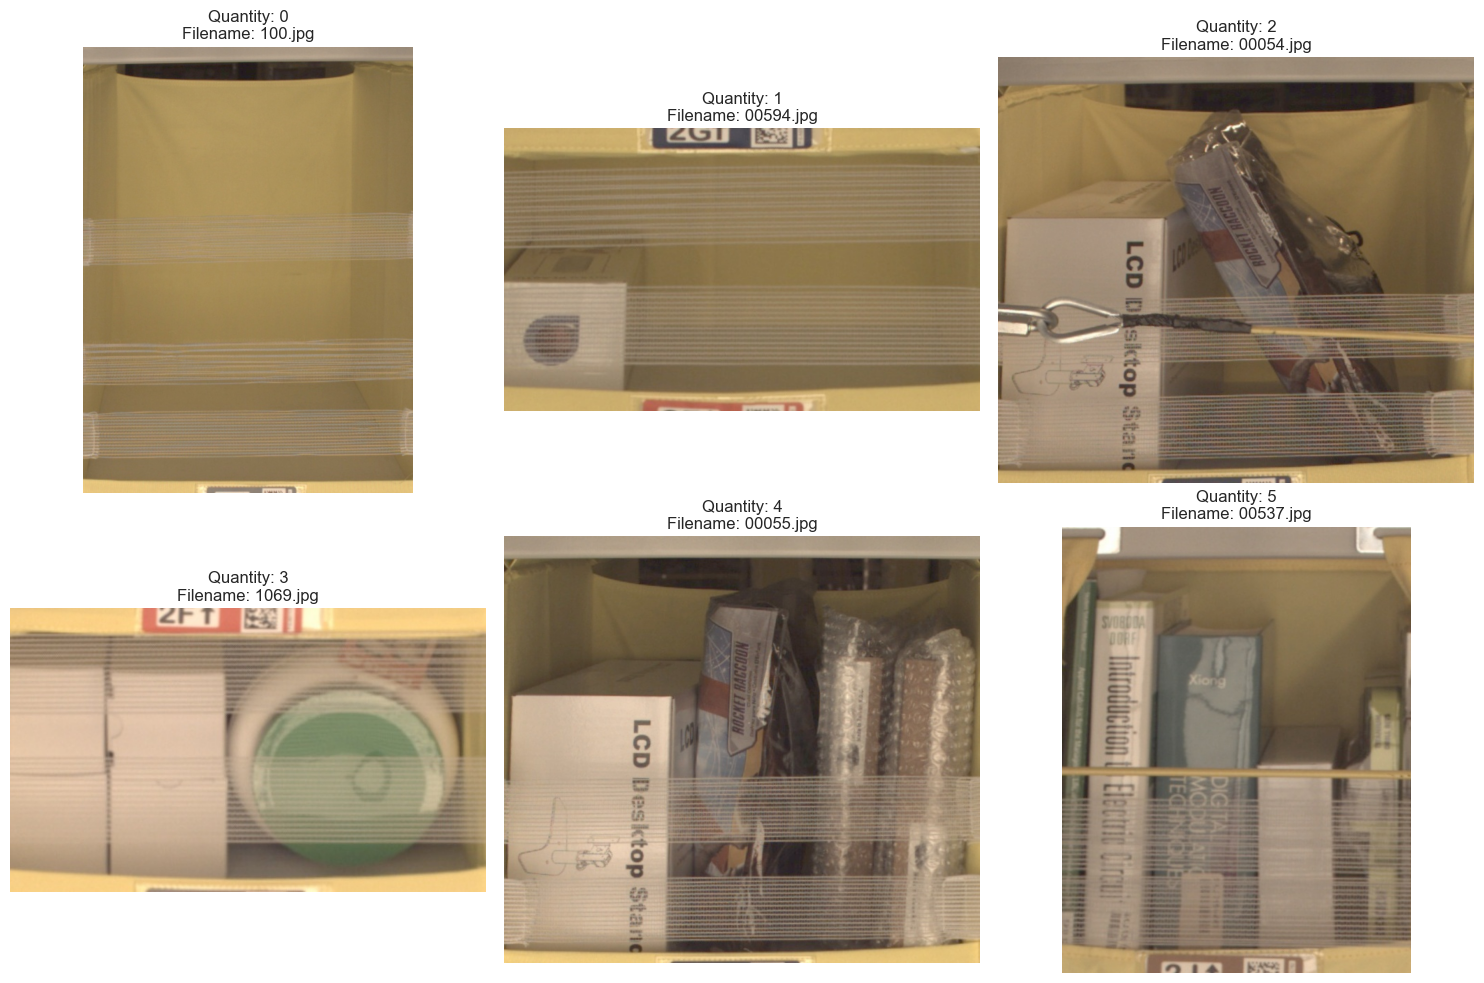

In [226]:
import pandas as pd
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset.csv')

# Path to the directory where your images are stored
image_directory = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images10000/'

# Predefined filenames for some quantity counts
filenames_for_quantities = {
    0: '100.jpg',
    1: '00594.jpg',
    2: '00054.jpg',
    3: '1069.jpg',
    4: '00055.jpg',
    5: '00537.jpg'
}

# Find a filename for quantity 5 if not already provided
if filenames_for_quantities[5] is None:
    filename = df[df['quantity'] == 5]['filename'].iloc[0] if not df[df['quantity'] == 5].empty else 'No Image'
    filenames_for_quantities[5] = filename

# Define a function to load and display an image for a given filename
def display_image_for_quantity(quantity, ax):
    filename = filenames_for_quantities.get(quantity)
    if filename and filename != 'No Image':
        image_path = image_directory + filename
        image = load_image(image_path)
        ax.imshow(image)
        ax.set_title(f"Quantity: {quantity}\nFilename: {filename}")
    else:
        ax.text(0.5, 0.5, 'No Image Available', horizontalalignment='center', verticalalignment='center')
    ax.axis('off')

# Display images for each quantity count
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust as necessary
quantities = sorted(filenames_for_quantities.keys())
for ax, quantity in zip(axes.flat, quantities):
    display_image_for_quantity(quantity, ax)
plt.tight_layout()
plt.show()

CLAHE and Resizing images

In [100]:
import cv2
from pathlib import Path

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l = clahe.apply(l)
    updated_lab = cv2.merge((l, a, b))
    return cv2.cvtColor(updated_lab, cv2.COLOR_LAB2BGR)

def resize_and_preprocess_images(input_folder, output_folder, size=(416, 416), batch_size=100):
    input_path = Path(input_folder)
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    images = list(input_path.glob('*.jpg'))
    total_images = len(images)
    num_batches = (total_images + batch_size - 1) // batch_size
    successful_saves = 0
    
    for i in range(num_batches):
        batch = images[i*batch_size:(i+1)*batch_size]
        for img_path in batch:
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"Warning: Image {img_path} could not be loaded and will be skipped.")
                continue
            
            img_resized = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)
            img_clahe = apply_clahe(img_resized)
            
            output_img_path = output_path / img_path.name
            if cv2.imwrite(str(output_img_path), img_clahe):
                successful_saves += 1
            else:
                print(f"Error: Processed image {output_img_path} could not be saved.")

        print(f"Processed batch {i+1}/{num_batches}, successfully saved {successful_saves} images out of {len(batch)}")

    print(f"Total images processed: {total_images}, successfully saved {successful_saves} images.")

input_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images10000'
output_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/resized_images'
resize_and_preprocess_images(input_folder, output_folder, size=(416, 416))


Processed batch 1/101, successfully saved 100 images out of 100
Processed batch 2/101, successfully saved 200 images out of 100
Processed batch 3/101, successfully saved 300 images out of 100
Processed batch 4/101, successfully saved 400 images out of 100
Processed batch 5/101, successfully saved 500 images out of 100
Processed batch 6/101, successfully saved 600 images out of 100
Processed batch 7/101, successfully saved 700 images out of 100
Processed batch 8/101, successfully saved 800 images out of 100
Processed batch 9/101, successfully saved 900 images out of 100
Processed batch 10/101, successfully saved 1000 images out of 100
Processed batch 11/101, successfully saved 1100 images out of 100
Processed batch 12/101, successfully saved 1200 images out of 100
Processed batch 13/101, successfully saved 1300 images out of 100
Processed batch 14/101, successfully saved 1400 images out of 100
Processed batch 15/101, successfully saved 1500 images out of 100
Processed batch 16/101, succ

Laplacian of Gaussian for image preprocessing

In [102]:
import cv2
import numpy as np
from pathlib import Path

def apply_laplacian_of_gaussian(image):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    # Apply Laplacian
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    # Normalize the Laplacian image to combine with the original
    laplacian_norm = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Combine original and enhanced edges
    enhanced_image = cv2.addWeighted(image, 0.85, laplacian_norm, 0.15, 0)
    return enhanced_image

def preprocess_images(input_folder, output_folder, size=(416, 416), batch_size=100):
    input_path = Path(input_folder)
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    images = list(input_path.glob('*.jpg'))
    total_images = len(images)
    num_batches = (total_images + batch_size - 1) // batch_size
    successful_saves = 0
    
    for i in range(num_batches):
        batch = images[i*batch_size:(i+1)*batch_size]
        for img_path in batch:
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"Warning: Image {img_path} could not be loaded and will be skipped.")
                continue
            
            img_enhanced = apply_laplacian_of_gaussian(img)
            
            output_img_path = output_path / img_path.name
            if cv2.imwrite(str(output_img_path), img_enhanced):
                successful_saves += 1
            else:
                print(f"Error: Processed image {output_img_path} could not be saved.")

        print(f"Processed batch {i+1}/{num_batches}, successfully saved {successful_saves} images out of {len(batch)}")

    print(f"Total images processed: {total_images}, successfully saved {successful_saves} images.")

# Define the input and output directories
input_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/resized_images'
output_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/processed_images'
preprocess_images(input_folder, output_folder)


Processed batch 1/101, successfully saved 100 images out of 100
Processed batch 2/101, successfully saved 200 images out of 100
Processed batch 3/101, successfully saved 300 images out of 100
Processed batch 4/101, successfully saved 400 images out of 100
Processed batch 5/101, successfully saved 500 images out of 100
Processed batch 6/101, successfully saved 600 images out of 100
Processed batch 7/101, successfully saved 700 images out of 100
Processed batch 8/101, successfully saved 800 images out of 100
Processed batch 9/101, successfully saved 900 images out of 100
Processed batch 10/101, successfully saved 1000 images out of 100
Processed batch 11/101, successfully saved 1100 images out of 100
Processed batch 12/101, successfully saved 1200 images out of 100
Processed batch 13/101, successfully saved 1300 images out of 100
Processed batch 14/101, successfully saved 1400 images out of 100
Processed batch 15/101, successfully saved 1500 images out of 100
Processed batch 16/101, succ